In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import io
import sqlite3


In [3]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
# Drop rows where Description is missing
df = df.dropna(subset=['Description'])

In [11]:
# Drop rows where CustomerID is missing (since it affects customer analysis)
df = df.dropna(subset=['CustomerID'])

In [12]:
# Convert CustomerID to integer (since it's stored as float)
df['CustomerID'] = df['CustomerID'].astype(int)

In [13]:
# Verify missing values are removed
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
# Check for duplicates
print(f"Duplicate rows before removal: {df.duplicated().sum()}")

Duplicate rows before removal: 5225


In [15]:
# Remove duplicates
df = df.drop_duplicates()

In [16]:
# Verify duplicates are removed
print(f"Duplicate rows after removal: {df.duplicated().sum()}")

Duplicate rows after removal: 0


In [17]:
# Remove transactions with negative or zero Quantity
df = df[df['Quantity'] > 0]

In [18]:
# Remove transactions with negative or zero UnitPrice
df = df[df['UnitPrice'] > 0]

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [20]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [21]:
# Remove canceled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [22]:
# Verify the cleaned data
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          CustomerID  
count  392692.000000  
mean    15287.843865  
min     12346.000000  
25%     13955.000000  
50%     15150.000000  
75%     16791.000000  
max     18287.000000  
std      1713.539549  


In [23]:
print('Unit Price: minimum value: ', df['UnitPrice'].min(), 'Unit Price: maximum value', df['UnitPrice'].max())

Unit Price: minimum value:  0.001 Unit Price: maximum value 8142.75


In [24]:
# Check items with very low prices
low_price_items = df[df['UnitPrice'] < 0.01]
print("Low Price Items:")
print(low_price_items[['StockCode', 'Description', 'UnitPrice']].head())

Low Price Items:
           StockCode                 Description  UnitPrice
157195          PADS  PADS TO MATCH ALL CUSHIONS      0.001
279045          PADS  PADS TO MATCH ALL CUSHIONS      0.001
359871          PADS  PADS TO MATCH ALL CUSHIONS      0.001
361741  BANK CHARGES                Bank Charges      0.001


In [25]:
# Check items with very high prices
high_price_items = df[df['UnitPrice'] > 5000  ]
print("\nHigh Price Items:")
print(high_price_items[['StockCode', 'Description', 'UnitPrice']].head())


High Price Items:
       StockCode Description  UnitPrice
173382      POST     POSTAGE    8142.75


In [26]:
# Check items with very minimum quantity
low_price_items = df[df['Quantity'] < 1]
print("Quantity validation:")
print(low_price_items[['StockCode', 'Quantity','Description', 'UnitPrice']].head())

Quantity validation:
Empty DataFrame
Columns: [StockCode, Quantity, Description, UnitPrice]
Index: []


In [27]:
# Convert InvoiceNo and StockCode to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

In [80]:
# Save clean data for Dashboard Design in Tableue
df.to_excel('/content/drive/MyDrive/OnlineRetail.xlsx')

In [28]:
# Create an SQLite database
conn = sqlite3.connect("ecommerce.db")

In [29]:
# Load DataFrame into SQLite
df.to_sql("online_retail", conn, if_exists="replace", index=False)

392692

In [30]:
# Verify by displaying table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  # Should display [('online_retail',)]

[('online_retail',)]


Exploratory DATA Analysis - SQL

Check Total Transactions & Revenue

In [71]:
query1 = """SELECT COUNT(*) AS Total_Transaction, SUM(UnitPrice * Quantity) AS Total_Revenue
        FROM online_retail
        """

result = pd.read_sql_query(query1, conn)
result['Total_Revenue'] = result['Total_Revenue'].apply(lambda x: "{:,.0f}".format(x))
print(result)


   Total_Transaction Total_Revenue
0             392692     8,887,209


Find Top 10 Best-Selling Products

In [56]:
query2 = """SELECT Description, SUM(Quantity) AS Total_Sold
        FROM online_retail
        GROUP BY Description
        ORDER BY Total_Sold DESC
        LIMIT 10; """

result = pd.read_sql_query(query2, conn)
print(result)

                          Description  Total_Sold
0         PAPER CRAFT , LITTLE BIRDIE       80995
1      MEDIUM CERAMIC TOP STORAGE JAR       77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS       54319
3             JUMBO BAG RED RETROSPOT       46078
4  WHITE HANGING HEART T-LIGHT HOLDER       36706
5       ASSORTED COLOUR BIRD ORNAMENT       35263
6     PACK OF 72 RETROSPOT CAKE CASES       33670
7                      POPCORN HOLDER       30919
8                  RABBIT NIGHT LIGHT       27153
9             MINI PAINT SET VINTAGE        26076


Visualizing top 10 selling products

<ipython-input-57-40e4f64a108e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sold', y='Description', data=top_selling_products, palette='viridis')


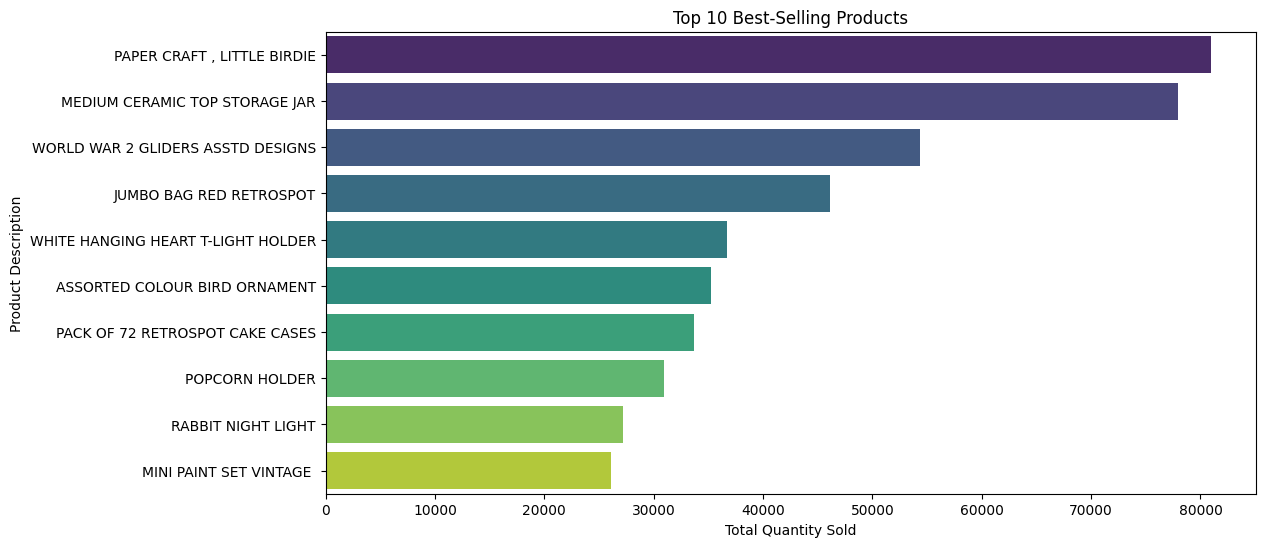

In [57]:
top_selling_products = pd.read_sql_query(query2, conn)

# Plot bar chart showing top selling products
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Sold', y='Description', data=top_selling_products, palette='viridis')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Best-Selling Products")
plt.show()

Monthly Sales Trends

In [52]:
query3 = """SELECT strftime('%Y - %m', InvoiceDate) AS Month,
        SUM(UnitPrice * Quantity) AS Total_Monthly_Revenue
        FROM online_retail
        GROUP BY Month
        ORDER BY Month; """

result = pd.read_sql_query(query3, conn)
monthly_sales = result
print(result)

        Month  Total_Monthly_Revenue
0   2010 - 12             570422.730
1   2011 - 01             568101.310
2   2011 - 02             446084.920
3   2011 - 03             594081.760
4   2011 - 04             468374.331
5   2011 - 05             677355.150
6   2011 - 06             660046.050
7   2011 - 07             598962.901
8   2011 - 08             644051.040
9   2011 - 09             950690.202
10  2011 - 10            1035642.450
11  2011 - 11            1156205.610
12  2011 - 12             517190.440


Visualizing Monthly sales trends.

<ipython-input-55-ae954c1b2580>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])


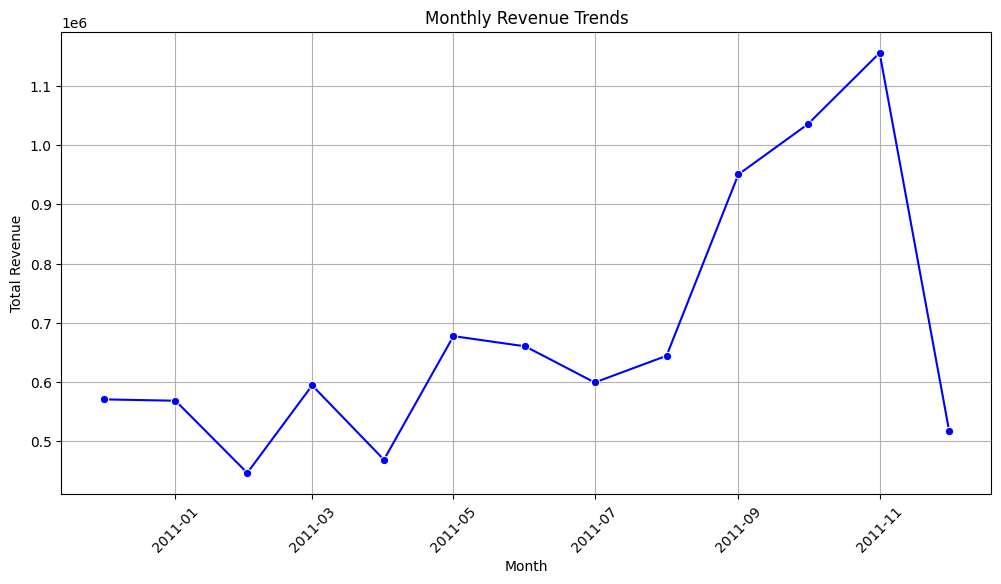

In [55]:
monthly_sales = pd.read_sql(query3, conn)
# Convert month column to datetime format
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Plot revenue trends
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total_Monthly_Revenue', data=monthly_sales, marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trends")
plt.xticks(rotation=45)
plt.grid()
plt.show()

 Most Frequent Customers

In [65]:
query4 = """SELECT CustomerID , SUM(UnitPrice * Quantity) AS Total_Spent
        FROM online_retail
        GROUP BY CustomerID
        ORDER BY Total_Spent DESC
        LIMIT 10;"""

result = pd.read_sql_query(query4, conn)
print(result)

   CustomerID  Total_Spent
0       14646    280206.02
1       18102    259657.30
2       17450    194390.79
3       16446    168472.50
4       14911    143711.17
5       12415    124914.53
6       14156    117210.08
7       17511     91062.38
8       16029     80850.84
9       12346     77183.60


Visualizing Top spending customers

<ipython-input-66-db868dcfa369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Spent', y=top_10_customers['CustomerID'].astype(str), data=top_10_customers, palette='coolwarm')


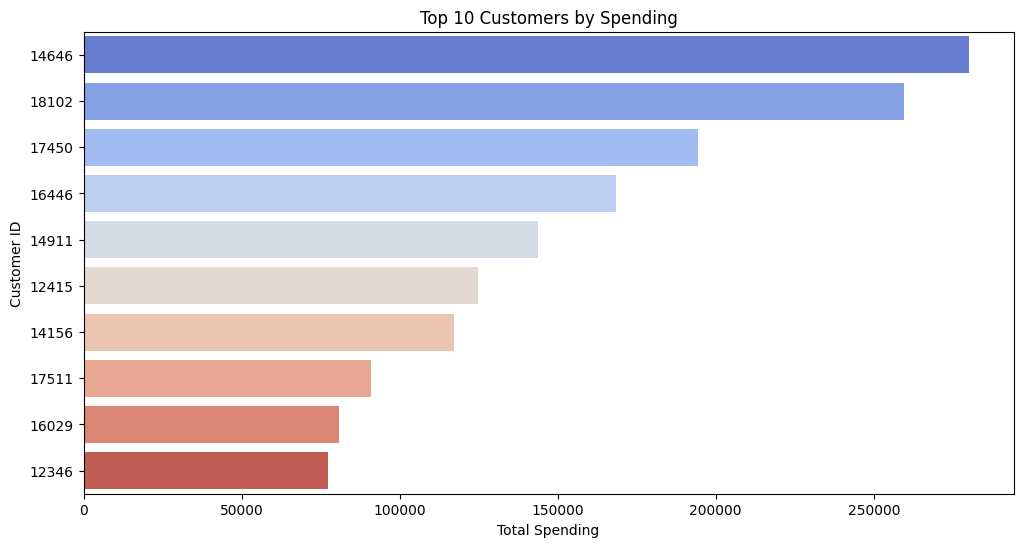

In [66]:
top_10_customers = pd.read_sql_query(query4, conn)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Spent', y=top_10_customers['CustomerID'].astype(str), data=top_10_customers, palette='coolwarm')
plt.xlabel("Total Spending")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Spending")
plt.show()

Customers with highest number of Transactions.

In [60]:
query4_b = """SELECT COUNT(InvoiceNo) AS Number_of_Transaction_by_Customer, CustomerID AS Customer
        FROM online_retail
        GROUP BY Customer
        ORDER BY Number_of_Transaction_by_Customer DESC
        LIMIT 10;"""

result = pd.read_sql_query(query4_b, conn)
print(result)

   Number_of_Transaction_by_Customer  Customer
0                               7676     17841
1                               5670     14911
2                               5111     14096
3                               4412     12748
4                               2677     14606
5                               2366     15311
6                               2076     14646
7                               1814     13089
8                               1667     13263
9                               1637     14298


Top 5 Countries by Revenue (Excluding UK)

In [46]:
query5 = """ SELECT Country, SUM(UnitPrice * Quantity) AS Revenue_by_countries
        FROM online_retail
        WHERE Country != "United Kingdom"
        GROUP BY Country
        ORDER BY Revenue_by_countries DESC
        LIMIT 5; """

result = pd.read_sql_query(query5, conn)
print(result)

       Country  Revenue_by_countries
0  Netherlands             285446.34
1         EIRE             265262.46
2      Germany             228678.40
3       France             208934.31
4    Australia             138453.81


Visualizing Revenue by Countries(Excluding UK)

<ipython-input-67-939336da8bce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue_by_countries', y='Country', data=top_5_countries, palette='Blues_r')


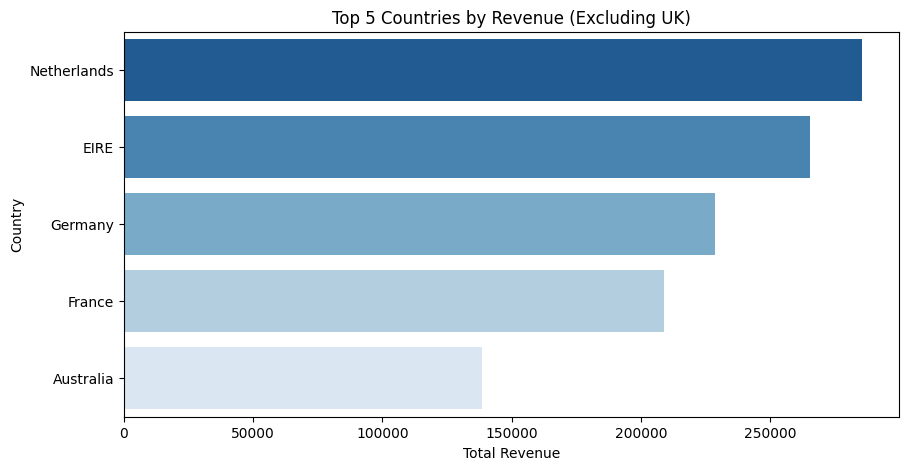

In [67]:
top_5_countries = pd.read_sql_query(query5, conn)
# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x='Revenue_by_countries', y='Country', data=top_5_countries, palette='Blues_r')
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.title("Top 5 Countries by Revenue (Excluding UK)")
plt.show()

Customer Segmentation Using K-Means Clustering.

In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select RFM features for clustering
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Standardize (scale) the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Show first few rows
print(rfm_scaled_df.head())


    Recency  Frequency  Monetary
0  2.334574  -0.425097  8.363010
1 -0.905340   0.354417  0.251699
2 -0.175360  -0.035340 -0.027988
3 -0.735345  -0.425097 -0.032406
4  2.174578  -0.425097 -0.190812


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


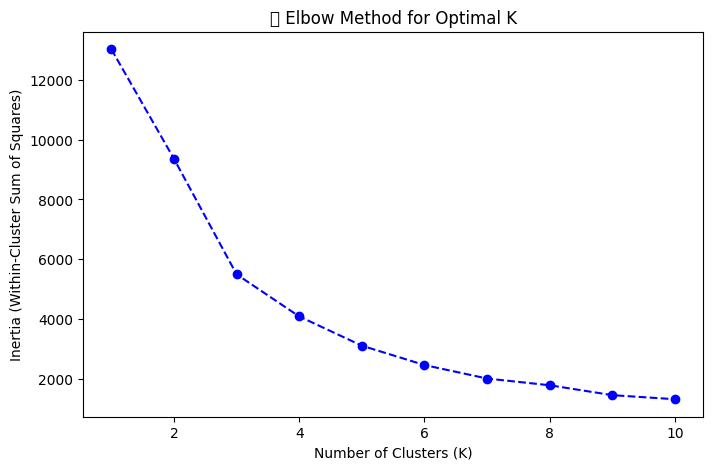

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Test different K values
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [77]:
# Apply K-Means with optimal K (adjust K based on Elbow Method)
optimal_k = 4  # Update if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Show first few rows with clusters
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].head())


            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346           325          1  77183.60        3
12347             1          7   4310.00        0
12348            74          4   1797.24        0
12349            18          1   1757.55        0
12350           309          1    334.40        1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


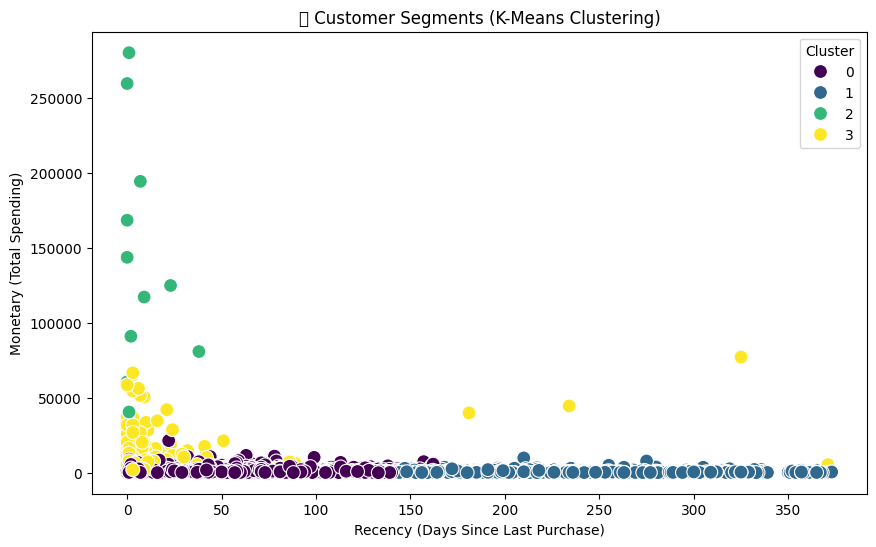

In [78]:
# Visualising Clusters using recency vs monetary

plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Monetary'], hue=rfm_df['Cluster'], palette='viridis', s=100)
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Monetary (Total Spending)")
plt.title("📊 Customer Segments (K-Means Clustering)")
plt.show()


Let's analyze the clustering insights from the provided scatter plot of "Recency (Days Since Last Purchase)" vs. "Monetary (Total Spending)" using **K-Means clustering.**

Understanding the Axes:

**Recency (X-axis):** Represents how recently a customer made a purchase (in days).1 Lower values mean more recent purchases.

**Monetary (Y-axis):** Represents the total amount of money a customer has spent.
Clustering Insights:

Based on the visualization, we can observe four distinct customer clusters (0, 1, 2, 3), each revealing different behavioral patterns:

**Cluster 0 (Dark Purple): **Low Recency, Low Monetary
These customers have made recent purchases but have relatively low total spending.
They are likely frequent shoppers who don't spend large amounts per transaction.
This could represent budget-conscious or value-seeking customers.

**Cluster 1 (Dark Blue):** Low Recency, High Monetary
These customers have made recent purchases and have high total spending.
They are the most valuable customers, representing high-value, recent shoppers.
They are likely loyal and engaged customers.

**Cluster 2 (Yellow):** High Recency, Moderate to Low Monetary
These customers have not made purchases recently and have moderate to low total spending.
They are likely churned or inactive customers.
They may require re-engagement strategies to win them back.

**Cluster 3 (Light Green):** Low to Moderate Recency, Moderate Monetary
These customers have made purchases with a moderate recency and have a moderate monetary value.
These are customers that have potential to be moved into the high value customers.
They are in the middle between high value and inactive.

**Key Insights and Potential Actions:**

**Identify High-Value Customers (Cluster 1):** Focus on retaining these customers through personalized offers, loyalty programs, and excellent customer service.

**Re-engage Inactive Customers (Cluster 2):** italicized text Develop targeted campaigns to win back these customers, such as special promotions or personalized recommendations.

**Nurture Potential High-Value Customers (Cluster 3):** Implement strategies to increase their spending and frequency of purchases.

**Analyze Low-Spending Frequent Shoppers (Cluster 0):** Understand their purchasing behavior and identify opportunities to increase their average order value.